## DATA SCIENCE WITH PYTHON : Customer Service Requests Analysis

### Course-end Project 2

#### Background of Problem Statement :

NYC 311's mission is to provide the public with quick and easy access to all New York City government services and information while offering the best customer service. Each day, NYC311 receives thousands of requests related to several hundred types of non-emergency services, including noise complaints, plumbing issues, and illegally parked cars. These requests are received by NYC311 and forwarded to the relevant agencies such as the police, buildings, or transportation. The agency responds to the request, addresses it, and then closes it.

#### Problem Objective :

Perform a service request data analysis of New York City 311 calls. You will focus on the data wrangling techniques to understand the pattern in the data and also visualize the major complaint types.
Domain: Customer Service

Import New York City 311 calls dataset

In [1]:
#import pandas and numpy
import pandas as pd
import numpy as np

#import seaborn
import seaborn as sns

df = pd.read_csv('311_Service_Requests_from_2010_to_Present.csv')

df.head()

C:\Users\tsiro\AppData\Local\Temp\ipykernel_12652\1667992083.py:8: DtypeWarning: Columns (48,49) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('311_Service_Requests_from_2010_to_Present.csv')


Unique Key            Created Date    Closed Date Agency  \
0    32310363  12/31/2015 11:59:45 PM  01-01-16 0:55   NYPD   
1    32309934  12/31/2015 11:59:44 PM  01-01-16 1:26   NYPD   
2    32309159  12/31/2015 11:59:29 PM  01-01-16 4:51   NYPD   
3    32305098  12/31/2015 11:57:46 PM  01-01-16 7:43   NYPD   
4    32306529  12/31/2015 11:56:58 PM  01-01-16 3:24   NYPD   

                       Agency Name           Complaint Type  \
0  New York City Police Department  Noise - Street/Sidewalk   
1  New York City Police Department         Blocked Driveway   
2  New York City Police Department         Blocked Driveway   
3  New York City Police Department          Illegal Parking   
4  New York City Police Department          Illegal Parking   

                     Descriptor    Location Type  Incident Zip  \
0              Loud Music/Party  Street/Sidewalk       10034.0   
1                     No Access  Street/Sidewalk       11105.0   
2                     No Access  Street/Sidewalk       10458.0   
3  Commercial Overnight Parking  Street/Sidewalk       10461.0   
4              Blocked Sidewalk  Street/Sidewalk       11373.0   

        Incident Address  ... Bridge Highway Name Bridge Highway Direction  \
0    71 VERMILYEA AVENUE  ...                 NaN                      NaN   
1        27-07 23 AVENUE  ...                 NaN                      NaN   
2  2897 VALENTINE AVENUE  ...                 NaN                      NaN   
3    2940 BAISLEY AVENUE  ...                 NaN                      NaN   
4          87-14 57 ROAD  ...                 NaN                      NaN   

  Road Ramp Bridge Highway Segment Garage Lot Name Ferry Direction  \
0       NaN                    NaN             NaN             NaN   
1       NaN                    NaN             NaN             NaN   
2       NaN                    NaN             NaN             NaN   
3       NaN                    NaN             NaN             NaN   
4       NaN                    NaN             NaN             NaN   

  Ferry Terminal Name   Latitude  Longitude  \
0                 NaN  40.865682 -73.923501   
1                 NaN  40.775945 -73.915094   
2                 NaN  40.870325 -73.888525   
3                 NaN  40.835994 -73.828379   
4                 NaN  40.733060 -73.874170   

                                   Location  
0   (40.86568153633767, -73.92350095571744)  
1  (40.775945312321085, -73.91509393898605)  
2  (40.870324522111424, -73.88852464418646)  
3   (40.83599404683083, -73.82837939584206)  
4  (40.733059618956815, -73.87416975810375)  

[5 rows x 53 columns]

View the shape of the data set

In [2]:
df.shape

(300698, 53)

Generate Profile Report using pandas

In [3]:
from ydata_profiling import ProfileReport

ProfileReport(df)



Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Identify variables with null values

In [4]:
#Identify variables with null values
na_values = df.isna().sum(axis=0)
na_values

Unique Key                             0
Created Date                           0
Closed Date                         2164
Agency                                 0
Agency Name                            0
Complaint Type                         0
Descriptor                          5914
Location Type                        131
Incident Zip                        2615
Incident Address                   44410
Street Name                        44410
Cross Street 1                     49279
Cross Street 2                     49779
Intersection Street 1             256840
Intersection Street 2             257336
Address Type                        2815
City                                2614
Landmark                          300349
Facility Type                       2171
Status                                 0
Due Date                               3
Resolution Description                 0
Resolution Action Updated Date      2187
Community Board                        0
Borough         

Remove the records whose 'Closed Date' values are null.
Since the percentage is 0.71, it is very less.
Usually, the industry practice allows us to drop rows up to 30%. So, we can drop the rows with missing values

In [5]:
#Remove the records whose 'Closed Date' values are null
cl_date_null_values = df['Closed Date'].isna().sum(axis=0)

percentage_of_missing_cl_date_values = (cl_date_null_values/df.shape[0])*100
percentage_of_missing_cl_date_values

0.7196589268967536

In [6]:
#the total rows with 'Closed Date' null values are 2164

print("The total rows of data set before removing the rows: {}".format(df.shape[0]))

df.dropna(subset=['Closed Date'], inplace = True)

print("The total rows of data set after removing the rows: {}".format(df.shape[0]))

The total rows of data set before removing the rows: 300698
The total rows of data set after removing the rows: 298534


Analyze the Created and Closed date column and remove entries that have an incorrect timeline

In [7]:
#No rows with invalid Created date, no entries removed

pd.to_datetime(df['Created Date'], errors='coerce').isna().sum()

0

In [8]:
#No rows with invalid Closed date, no entries removed

pd.to_datetime(df['Closed Date'], errors='coerce').isna().sum()

0

## Create a new column ‘Request_Closing_Time’ as the time elapsed between request creation and request closing.
Convert the new column to minutes to better representations.

In [9]:
#Calculate the time elapsed in closed and creation date
created_date = pd.to_datetime(df['Created Date'])
closed_date = pd.to_datetime(df['Closed Date'])

df['Request_Closing_Time'] = closed_date - created_date

df.tail()

Unique Key            Created Date             Closed Date Agency  \
300692    30281370  03/29/2015 12:34:32 AM  03/29/2015 01:13:01 AM   NYPD   
300694    30281230  03/29/2015 12:33:28 AM  03/29/2015 02:33:59 AM   NYPD   
300695    30283424  03/29/2015 12:33:03 AM  03/29/2015 03:40:20 AM   NYPD   
300696    30280004  03/29/2015 12:33:02 AM  03/29/2015 04:38:35 AM   NYPD   
300697    30281825  03/29/2015 12:33:01 AM  03/29/2015 04:41:50 AM   NYPD   

                            Agency Name      Complaint Type        Descriptor  \
300692  New York City Police Department  Noise - Commercial  Loud Music/Party   
300694  New York City Police Department    Blocked Driveway    Partial Access   
300695  New York City Police Department  Noise - Commercial  Loud Music/Party   
300696  New York City Police Department  Noise - Commercial  Loud Music/Party   
300697  New York City Police Department  Noise - Commercial  Loud Music/Party   

              Location Type  Incident Zip          Incident Address  ...  \
300692     Store/Commercial       10002.0          81 HESTER STREET  ...   
300694      Street/Sidewalk       11418.0          100-17 87 AVENUE  ...   
300695  Club/Bar/Restaurant       11206.0         162 THROOP AVENUE  ...   
300696  Club/Bar/Restaurant       10461.0  3151 EAST TREMONT AVENUE  ...   
300697     Store/Commercial       10036.0        251 WEST 48 STREET  ...   

       Bridge Highway Direction Road Ramp Bridge Highway Segment  \
300692                      NaN       NaN                    NaN   
300694                      NaN       NaN                    NaN   
300695                      NaN       NaN                    NaN   
300696                      NaN       NaN                    NaN   
300697                      NaN       NaN                    NaN   

       Garage Lot Name Ferry Direction Ferry Terminal Name   Latitude  \
300692             NaN             NaN                 NaN  40.716053   
300694             NaN             NaN                 NaN  40.694077   
300695             NaN             NaN                 NaN  40.699590   
300696             NaN             NaN                 NaN  40.837708   
300697             NaN             NaN                 NaN  40.760583   

        Longitude                                 Location  \
300692 -73.991378  (40.71605290789855, -73.99137850370803)   
300694 -73.846087   (40.69407728322387, -73.8460866160573)   
300695 -73.944234  (40.69959035300927, -73.94423377144169)   
300696 -73.834587   (40.8377075854206, -73.83458731019586)   
300697 -73.985922  (40.76058322950115, -73.98592204392392)   

       Request_Closing_Time  
300692      0 days 00:38:29  
300694      0 days 02:00:31  
300695      0 days 03:07:17  
300696      0 days 04:05:33  
300697      0 days 04:08:49  

[5 rows x 54 columns]

In [10]:
#Convert the result to minutes
df['Request_Closing_Time'] = df['Request_Closing_Time'] / np.timedelta64(1, 'm')

df.head(50)

Unique Key            Created Date             Closed Date Agency  \
0     32310363  12/31/2015 11:59:45 PM           01-01-16 0:55   NYPD   
1     32309934  12/31/2015 11:59:44 PM           01-01-16 1:26   NYPD   
2     32309159  12/31/2015 11:59:29 PM           01-01-16 4:51   NYPD   
3     32305098  12/31/2015 11:57:46 PM           01-01-16 7:43   NYPD   
4     32306529  12/31/2015 11:56:58 PM           01-01-16 3:24   NYPD   
5     32306554  12/31/2015 11:56:30 PM           01-01-16 1:50   NYPD   
6     32306559  12/31/2015 11:55:32 PM           01-01-16 1:53   NYPD   
7     32307009  12/31/2015 11:54:05 PM           01-01-16 1:42   NYPD   
8     32308581  12/31/2015 11:53:58 PM           01-01-16 8:27   NYPD   
9     32308391  12/31/2015 11:53:58 PM           01-01-16 1:17   NYPD   
10    32305071  12/31/2015 11:52:58 PM           01-01-16 7:41   NYPD   
11    32306260  12/31/2015 11:50:57 PM          01-01-16 10:58   NYPD   
12    32306612  12/31/2015 11:48:03 PM           01-01-16 2:17   NYPD   
13    32305074  12/31/2015 11:47:58 PM           01-01-16 8:18   NYPD   
14    32309424  12/31/2015 11:47:37 PM          01-01-16 10:17   NYPD   
15    32309853  12/31/2015 11:47:30 PM          01-01-16 15:20   NYPD   
16    32305538  12/31/2015 11:47:02 PM           01-01-16 4:39   NYPD   
17    32310273  12/31/2015 11:44:52 PM           01-01-16 0:36   NYPD   
18    32306617  12/31/2015 11:40:59 PM           01-01-16 2:37   NYPD   
19    32308195  12/31/2015 11:40:55 PM           01-01-16 0:28   NYPD   
20    32310127  12/31/2015 11:40:43 PM           01-01-16 4:12   NYPD   
21    32307994  12/31/2015 11:38:51 PM           01-01-16 9:11   NYPD   
22    32307233  12/31/2015 11:34:18 PM           01-01-16 0:50   NYPD   
23    32308765  12/31/2015 11:32:46 PM           01-01-16 0:25   NYPD   
24    32308423  12/31/2015 11:31:40 PM          01-03-16 16:22   NYPD   
25    32308426  12/31/2015 11:30:28 PM           01-01-16 2:47   NYPD   
26    32305916  12/31/2015 11:26:41 PM  12/31/2015 11:53:31 PM   NYPD   
27    32308379  12/31/2015 11:26:35 PM           01-01-16 5:07   NYPD   
28    32309402  12/31/2015 11:25:56 PM           01-01-16 1:12   NYPD   
29    32308850  12/31/2015 11:25:01 PM           01-01-16 1:55   NYPD   
30    32310297  12/31/2015 11:22:51 PM           01-01-16 1:22   NYPD   
31    32308054  12/31/2015 11:21:24 PM           01-01-16 1:55   NYPD   
32    32307660  12/31/2015 11:19:22 PM           01-01-16 7:47   NYPD   
33    32306700  12/31/2015 11:18:10 PM           01-02-16 1:04   NYPD   
34    32309182  12/31/2015 11:16:06 PM           01-01-16 1:39   NYPD   
35    32308637  12/31/2015 11:15:27 PM           01-01-16 5:06   NYPD   
36    32306281  12/31/2015 11:13:47 PM  12/31/2015 11:32:32 PM   NYPD   
37    32307213  12/31/2015 11:12:45 PM           01-01-16 5:37   NYPD   
38    32308014  12/31/2015 11:11:33 PM  12/31/2015 11:41:01 PM   NYPD   
39    32306752  12/31/2015 11:11:24 PM           01-01-16 1:18   NYPD   
40    32307354  12/31/2015 11:11:18 PM  12/31/2015 11:16:13 PM   NYPD   
41    32308746  12/31/2015 11:10:03 PM  12/31/2015 11:14:04 PM   NYPD   
42    32307464  12/31/2015 11:09:55 PM           01-01-16 1:19   NYPD   
43    32308024  12/31/2015 11:09:25 PM  12/31/2015 11:14:04 PM   NYPD   
44    32305551  12/31/2015 11:09:16 PM           01-01-16 5:06   NYPD   
45    32308118  12/31/2015 11:08:41 PM  12/31/2015 11:16:14 PM   NYPD   
46    32308949  12/31/2015 11:08:26 PM           01-01-16 1:19   NYPD   
47    32309312  12/31/2015 11:07:32 PM           01-01-16 6:15   NYPD   
48    32306616  12/31/2015 11:07:20 PM  12/31/2015 11:36:44 PM   NYPD   
49    32307323  12/31/2015 11:06:58 PM           01-01-16 1:21   NYPD   

                        Agency Name            Complaint Type  \
0   New York City Police Department   Noise - Street/Sidewalk   
1   New York City Police Department          Blocked Driveway   
2   New York City Police Department          Blocked Driveway   
3   New York City Po

Impute 'City' null values with 'Unknown City'

In [11]:
#There are 506 rows with null 'City' value
city_null_values = df['City'].isna().sum(axis=0)
city_null_values

506

In [12]:
#Impute the NA value with 'Unknown City'
df['City'] = df['City'].fillna('Unknown City')

Do the same with Location Type

In [13]:
#There are 128 rows with null 'Location Type' value
location_null_values = df['Location Type'].isna().sum(axis=0)
location_null_values

128

In [14]:
#Impute the NA value with 'Unknown Location'
df['Location Type'] = df['Location Type'].fillna('Unknown Location')

Remove unnecessary null 'Latitude', 'Longitude', 'Incident Zip' column values if the total percentage is below 30% of total dataset

In [15]:
#Remove the records whose 'Latitude' values are null
lat_null_values = df['Latitude'].isna().sum(axis=0)

percentage_of_missing_lat_values = (lat_null_values/df.shape[0])*100
percentage_of_missing_lat_values

0.47967735668299094

In [16]:
print("The total rows of data set before removing the rows: {}".format(df.shape[0]))

df.dropna(subset=['Latitude'], inplace = True)

print("The total rows of data set after removing the rows: {}".format(df.shape[0]))

The total rows of data set before removing the rows: 298534
The total rows of data set after removing the rows: 297102


In [17]:
#Remove the records whose 'Longitude' values are null
long_null_values = df['Longitude'].isna().sum(axis=0)
long_null_values

0

No rows with Longitude null after removing the null Latitude rows

In [18]:
#Remove the records whose 'Incident Zip' values are null
izip_null_values = df['Incident Zip'].isna().sum(axis=0)

percentage_of_missing_izip_values = (izip_null_values/df.shape[0])*100
percentage_of_missing_izip_values

0.013799974419559612

In [19]:
print("The total rows of data set before removing the rows: {}".format(df.shape[0]))

df.dropna(subset=['Incident Zip'], inplace = True)

print("The total rows of data set after removing the rows: {}".format(df.shape[0]))

The total rows of data set before removing the rows: 297102
The total rows of data set after removing the rows: 297061


List all numerical feature columns

In [20]:
numerical_feature_columns = list(df._get_numeric_data().columns)
numerical_feature_columns

['Unique Key',
 'Incident Zip',
 'X Coordinate (State Plane)',
 'Y Coordinate (State Plane)',
 'School or Citywide Complaint',
 'Vehicle Type',
 'Taxi Company Borough',
 'Taxi Pick Up Location',
 'Garage Lot Name',
 'Latitude',
 'Longitude',
 'Request_Closing_Time']

List all categorical feature columns

In [21]:
categorical_feature_columns = list(set(df.columns) - set(df._get_numeric_data().columns))
categorical_feature_columns

['Incident Address',
 'Cross Street 1',
 'Agency',
 'Bridge Highway Name',
 'Complaint Type',
 'Due Date',
 'Intersection Street 1',
 'School Region',
 'Bridge Highway Direction',
 'Ferry Direction',
 'Location Type',
 'Park Borough',
 'Community Board',
 'School Address',
 'Closed Date',
 'Created Date',
 'School Name',
 'School City',
 'Location',
 'School Zip',
 'Facility Type',
 'Status',
 'Agency Name',
 'Street Name',
 'Cross Street 2',
 'Landmark',
 'Descriptor',
 'School Number',
 'Park Facility Name',
 'Intersection Street 2',
 'School Code',
 'Ferry Terminal Name',
 'City',
 'Resolution Action Updated Date',
 'Resolution Description',
 'School Phone Number',
 'Borough',
 'School State',
 'Road Ramp',
 'Bridge Highway Segment',
 'School Not Found',
 'Address Type']

Detect outliers for main numerical feature columns, 'Latitude', 'Longitude', 'Incident Zip'.
Use 'outlier_treatment' function to remove them

In [22]:
def outlier_treatment(col):
    sorted(col)
    Q1,Q3 = np.percentile(col , [25,75])
    IQR = Q3 - Q1
    lower_range = Q1 - (1.5 * IQR)
    upper_range = Q3 + (1.5 * IQR)
    return lower_range,upper_range

In [23]:
columns = ['Latitude', 'Longitude', 'Incident Zip']

total_index = []

for col in columns:
    lower_range,upper_range = outlier_treatment(df[col])
    print("Lower Range for {}:".format(col),lower_range)
    print("Upper Range for {}:".format(col),upper_range)
    print()
    
    lower_index = list(df[df[col].values < lower_range].index)
    upper_index = list(df[df[col].values > upper_range].index)    
    
    print("Total Lower Indexes for {}:".format(col),len(lower_index))
    print("Total Upper Indexes for {}:".format(col),len(upper_index))
    print("Total Number of Outliers for {}:".format(col),len(lower_index + upper_index))
    print()
    
    total_index += list(lower_index + upper_index)

Lower Range for Latitude: 40.501689279999994
Upper Range for Latitude: 40.949930800000004

Total Lower Indexes for Latitude: 18
Total Upper Indexes for Latitude: 0
Total Number of Outliers for Latitude: 18

Lower Range for Longitude: -74.11509061000001
Upper Range for Longitude: -73.73381677

Total Lower Indexes for Longitude: 8072
Total Upper Indexes for Longitude: 1899
Total Number of Outliers for Longitude: 9971

Lower Range for Incident Zip: 8923.0
Upper Range for Incident Zip: 12627.0

Total Lower Indexes for Incident Zip: 97
Total Upper Indexes for Incident Zip: 0
Total Number of Outliers for Incident Zip: 97



In [24]:
print("Shape before dropping outlier rows:", df.shape)
df.drop(total_index, inplace = True)
print("Shape after dropping outlier rows:", df.shape)

Shape before dropping outlier rows: (297061, 54)
Shape after dropping outlier rows: (286993, 54)


List unique Complaint Types after initial Data Wrangling process

In [25]:
df['Complaint Type'].unique()

array(['Noise - Street/Sidewalk', 'Blocked Driveway', 'Illegal Parking',
       'Derelict Vehicle', 'Noise - Commercial',
       'Noise - House of Worship', 'Noise - Vehicle', 'Animal Abuse',
       'Vending', 'Traffic', 'Drinking', 'Bike/Roller/Skate Chronic',
       'Panhandling', 'Noise - Park', 'Homeless Encampment',
       'Urinating in Public', 'Posting Advertisement', 'Graffiti',
       'Disorderly Youth', 'Illegal Fireworks', 'Squeegee'], dtype=object)

## Provide major insights/patterns that you can offer in a visual format (graphs or tables); at least 4 major conclusions that you can come up with after generic data mining.

In [26]:
df.describe()

Unique Key   Incident Zip  X Coordinate (State Plane)  \
count  2.869930e+05  286993.000000                2.869930e+05   
mean   3.130000e+07   10866.277857                1.006340e+06   
std    5.743624e+05     549.853978                1.850594e+04   
min    3.027948e+07   10000.000000                9.522790e+05   
25%    3.079944e+07   10452.000000                9.932410e+05   
50%    3.130374e+07   11209.000000                1.003690e+06   
75%    3.178447e+07   11238.000000                1.018582e+06   
max    3.231065e+07   11697.000000                1.058109e+06   

       Y Coordinate (State Plane)  School or Citywide Complaint  Vehicle Type  \
count               286993.000000                           0.0           0.0   
mean                205285.263003                           NaN           NaN   
std                  28871.808994                           NaN           NaN   
min                 141609.000000                           NaN           NaN   
25%                 185159.000000                           NaN           NaN   
50%                 202250.000000                           NaN           NaN   
75%                 226330.000000                           NaN           NaN   
max                 271876.000000                           NaN           NaN   

       Taxi Company Borough  Taxi Pick Up Location  Garage Lot Name  \
count                   0.0                    0.0              0.0   
mean                    NaN                    NaN              NaN   
std                     NaN                    NaN              NaN   
min                     NaN                    NaN              NaN   
25%                     NaN                    NaN              NaN   
50%                     NaN                    NaN              NaN   
75%                     NaN                    NaN              NaN   
max                     NaN                    NaN              NaN   

            Latitude      Longitude  Request_Closing_Time  
count  286993.000000  286993.000000         286993.000000  
mean       40.730090     -73.920275            257.466580  
std         0.079240       0.066770            359.014148  
min        40.555338     -74.115090              1.000000  
25%        40.674836     -73.967575             76.566667  
50%        40.721773     -73.929856            162.750000  
75%        40.787883     -73.876087            320.000000  
max        40.912869     -73.733829          35572.366667

From the above Summary table, we can conclude to three main points:
a: the average request closing time in minutes is 257
b: the min closing time is 1 min
c: the max closing time is 35572 minutes

In [27]:
#importing matplolib
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline 


## Univariate Analysis for numerical features

C:\Users\tsiro\AppData\Local\Temp\ipykernel_12652\3921547445.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[num_cols[i]], hist=True, kde=True)
C:\Users\tsiro\AppData\Local\Temp\ipykernel_12652\3921547445.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[num_cols[i+1]], hist=True, kd

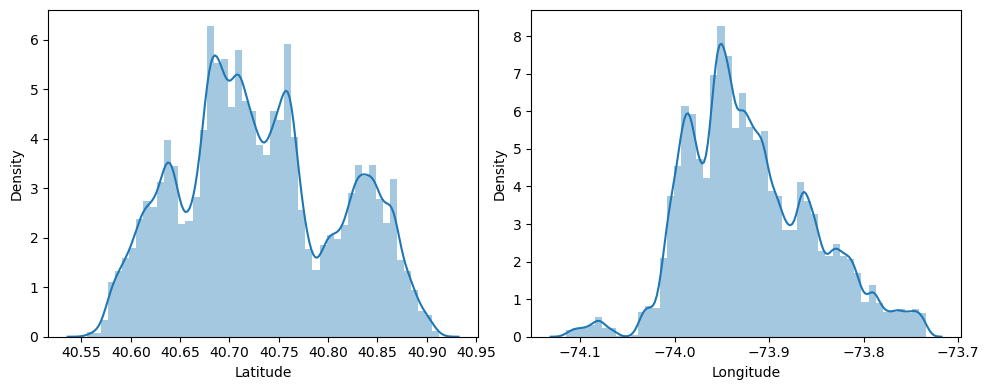

C:\Users\tsiro\AppData\Local\Temp\ipykernel_12652\3921547445.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[num_cols[i]], hist=True, kde=True)
C:\Users\tsiro\AppData\Local\Temp\ipykernel_12652\3921547445.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[num_cols[i+1]], hist=True, kd

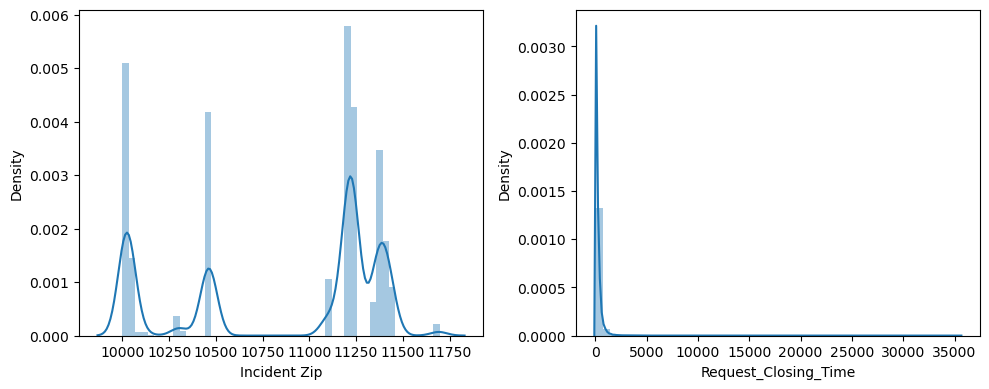

In [28]:
num_cols = ['Latitude', 'Longitude', 'Incident Zip', 'Request_Closing_Time']

for i in range(0,len(num_cols),2):
        plt.figure(figsize=(10,4))
        plt.subplot(121)
        sns.distplot(df[num_cols[i]], hist=True, kde=True)
        plt.subplot(122)            
        sns.distplot(df[num_cols[i+1]], hist=True, kde=True)
        plt.tight_layout()
        plt.show()

Use Kernel Density Estimation with histogram to analyze and visualize frequency distribution for the 3 major numerical features of the dataset and the target Request_Closing_Time column. We can see that the frequencies of the features are normaly distributed, because the data wrangling techique has been already applied above.
After plotting the Request_Closing_Time, we can see that the request closing time in minutes is right skewed.

Use Boxplot to further inspect the outlier distribution accross the 3 major numerical feature columns and the target one

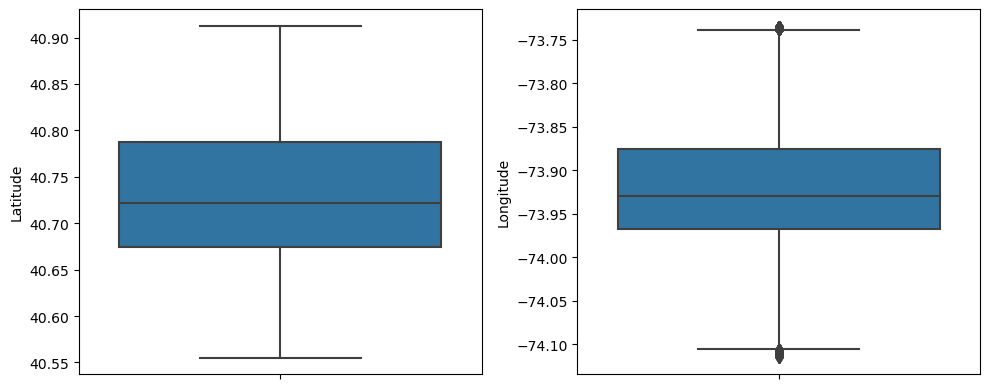

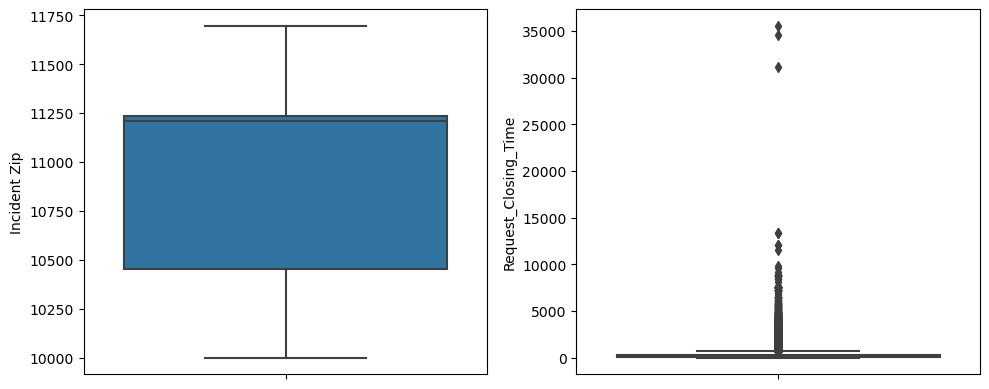

In [29]:
num_cols = ['Latitude', 'Longitude', 'Incident Zip', 'Request_Closing_Time']

facet=None

for i in range(0,len(num_cols),2):
        plt.figure(figsize=(10,4))
        plt.subplot(121)
        sns.boxplot(y=num_cols[i],data = df)
        plt.subplot(122)            
        sns.boxplot(y=num_cols[i+1],data = df)
        plt.tight_layout()
        plt.show()

As it is expected the outliers for the feature columns have been removed. Again we can see that the closing time's frequency is not evenly distributed

## Univariate Analysis for Categorical Variable

<AxesSubplot: xlabel='count', ylabel='Complaint Type'>

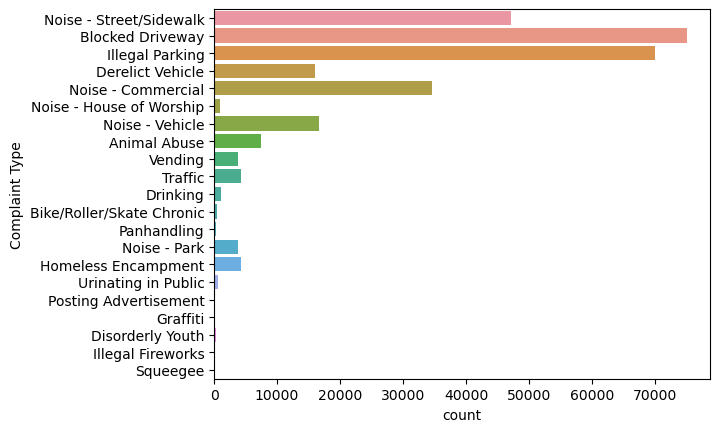

In [30]:
#Plot a bar graph to show the types of complaints
sns.countplot(y='Complaint Type', data=df)

In the above graph, we can see the count of observations in each 'Complaint Type' categorical bin using bars.

<AxesSubplot: xlabel='count', ylabel='Location Type'>

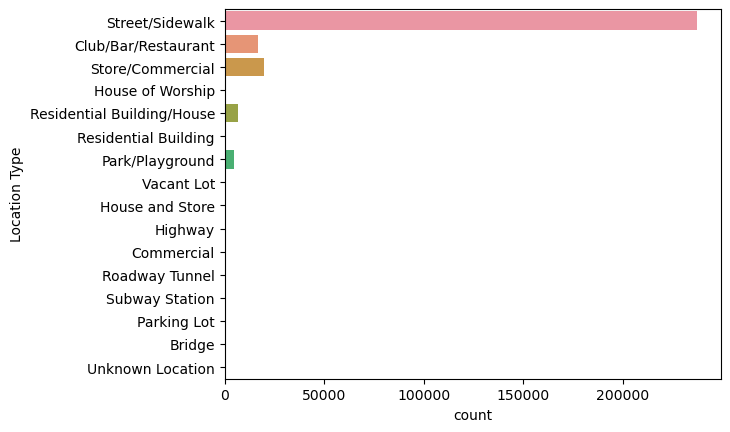

In [31]:
#Plot a bar graph to show the types of different locations
sns.countplot(y='Location Type', data=df)

In the above graph, we can see the count of observations in each 'Location Type' categorical bin using bars.

## Multivariate Analysis

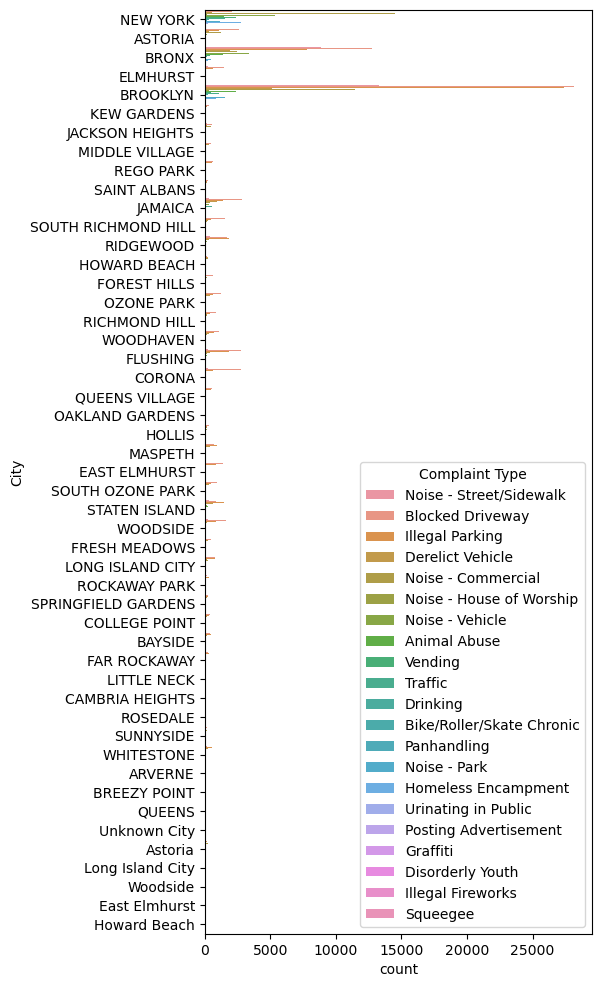

In [32]:
#Draw a frequency plot for the complaints in each city
plt.figure(figsize=(5,12))
sns.countplot(y ='City', hue = "Complaint Type", data = df, width=1)
 
# Show the plot
plt.show()

From the above graph, we can visualize the frequencies of complaint types accross different Cities. The most complaints are located in Brooklyn.

In [33]:
df.groupby(['City'])['Complaint Type'].count().sort_values(ascending=False).head(10)

City
BROOKLYN         98101
NEW YORK         65378
BRONX            40588
JAMAICA           7284
ASTORIA           6315
FLUSHING          5966
RIDGEWOOD         5160
CORONA            4294
STATEN ISLAND     4258
WOODSIDE          3541
Name: Complaint Type, dtype: int64

Validate the above graph outcome by listing the total complaints per city. Brooklyn and New York are top 2 cities with the most complaint types.

[Text(0.5, 1.0, 'Frequency of complaints for BROOKLYN')]

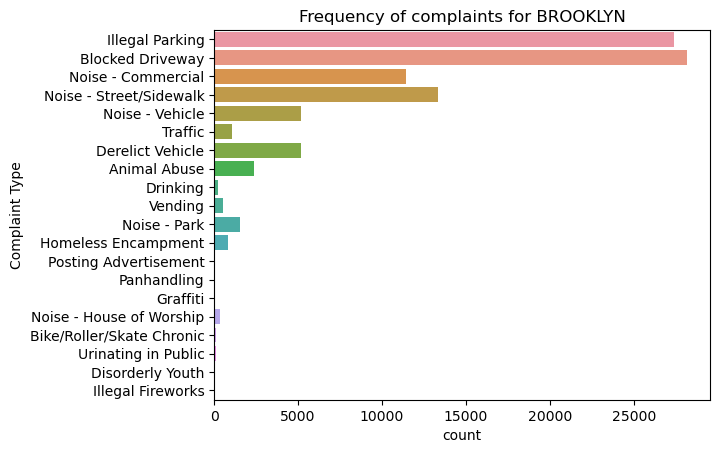

In [34]:
#Check the frequency of various types of complaints for BROOKLYN
df_ny = df[df["City"] == 'BROOKLYN']

sns.countplot(y='Complaint Type', data=df_ny).set(title='Frequency of complaints for BROOKLYN')

Frequency countplot distribution graph for the type of complaints in Brooklyn. 'Blocked Driveway' and 'Illegal Parking' are the most occuring complaints in Brookyn.

<AxesSubplot: xlabel='City'>

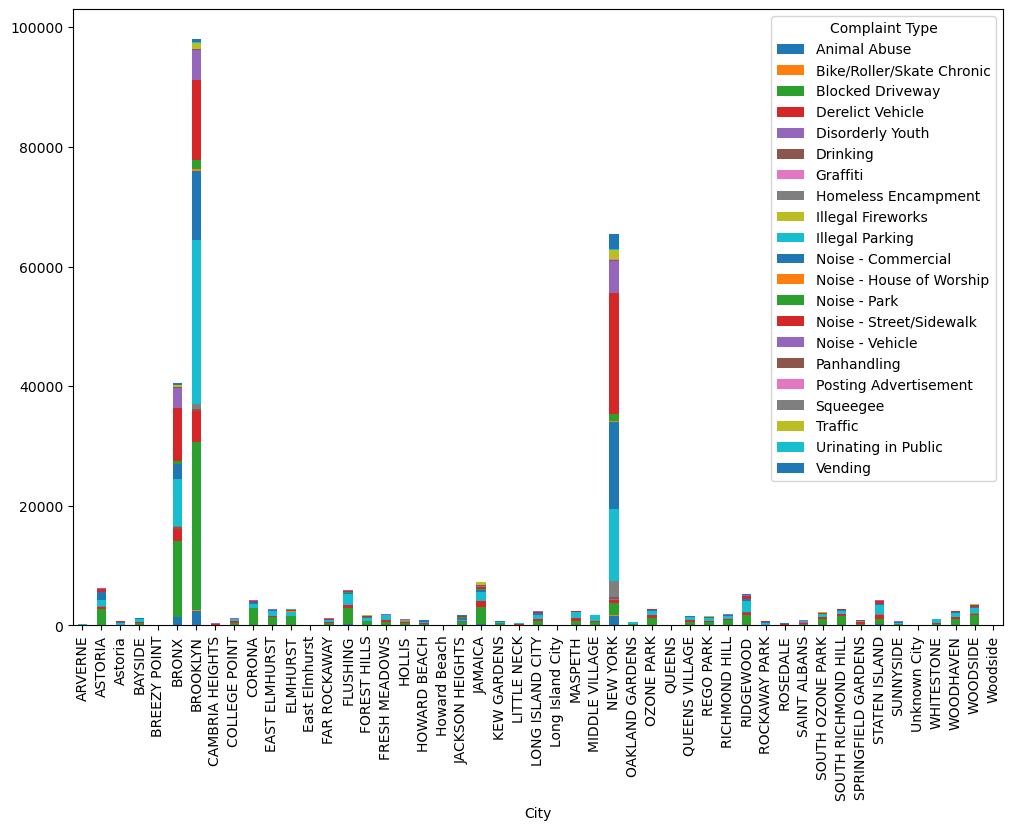

In [35]:
#Draw a chart that shows the types of complaints in each city in a single chart, where different colors
# show the different types of complaints

crosstab = pd.crosstab(index=df["City"], columns=df["Complaint Type"])
crosstab

crosstab.plot(kind="bar", figsize=(12,8), stacked=True)

In the above graph, we can see the stacked barplot, which is used to break down and compare parts of a whole. 
Each bar in the chart represents a whole, and segments in the bar represent different parts or categories of that whole. 
Here we are considering two variables, 'City' and 'Complaint Type' to check the relationship between both of these.

               Complaint Type  Request_Closing_Time
0                Animal Abuse            312.010287
1   Bike/Roller/Skate Chronic            222.188808
2            Blocked Driveway            284.047821
3            Derelict Vehicle            438.668686
4            Disorderly Youth            210.248086
5                    Drinking            232.287953
6                    Graffiti            432.370387
7         Homeless Encampment            260.643355
8           Illegal Fireworks            163.812473
9             Illegal Parking            269.519510
10         Noise - Commercial            187.655332
11   Noise - House of Worship            192.091538
12               Noise - Park            203.682160
13    Noise - Street/Sidewalk            206.561968
14            Noise - Vehicle            215.709718
15                Panhandling            263.423345
16      Posting Advertisement            219.586869
17                   Squeegee            242.737500
18          

<AxesSubplot: xlabel='Request_Closing_Time', ylabel='Complaint Type'>

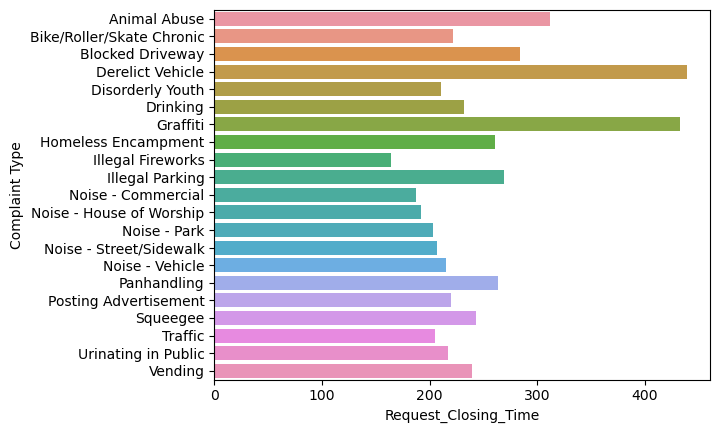

In [36]:
#Visualize the average of 'Request_Closing_Time' across different complaint types

#use as_index=False to output as DataFrame
avg_cmpl_types = df.groupby('Complaint Type', as_index=False)['Request_Closing_Time'].mean()

print(avg_cmpl_types)
sns.barplot(y = 'Complaint Type', x = 'Request_Closing_Time',data=avg_cmpl_types)

List and visualize the average request closing time accross the different complaint types. 'Derelict Vehicle' takes the most time in average to be resolved, while 'Illegal Fireworks' is the complaint with the least averaged resolved time.

## Order the complaint types based on the average ‘Request_Closing_Time’, grouping them for different locations

In [37]:
df_gr_loc_mean = df.groupby(['Complaint Type', 'Location Type'])['Request_Closing_Time'].agg(['mean']).head(50)
print(df_gr_loc_mean)

                                                             mean
Complaint Type            Location Type                          
Animal Abuse              Commercial                   321.493443
                          House and Store              304.558427
                          Park/Playground              219.489076
                          Parking Lot                  347.118977
                          Residential Building         284.436149
                          Residential Building/House   323.279820
                          Store/Commercial             256.386867
                          Street/Sidewalk              305.389072
                          Subway Station               182.136364
                          Unknown Location             240.444444
Bike/Roller/Skate Chronic Residential Building/House   216.678000
                          Store/Commercial             230.400000
                          Street/Sidewalk              221.295646
Blocked Dr

In [38]:
df_gr_loc_mean.sort_values(by='mean',ascending=False).head(50)

mean
Complaint Type            Location Type                          
Derelict Vehicle          Roadway Tunnel              1239.062500
Graffiti                  Street/Sidewalk              749.845139
Homeless Encampment       Unknown Location             505.761111
Derelict Vehicle          Unknown Location             442.600000
                          Street/Sidewalk              438.673806
                          Vacant Lot                   436.997619
Graffiti                  Residential Building/House   352.727976
Animal Abuse              Parking Lot                  347.118977
Illegal Fireworks         Park/Playground              338.090476
Illegal Parking           Unknown Location             336.466146
Graffiti                  Store/Commercial             333.638542
Animal Abuse              Residential Building/House   323.279820
                          Commercial                   321.493443
                          Street/Sidewalk              305.389072
                          House and Store              304.558427
Homeless Encampment       Residential Building/House   289.415926
Animal Abuse              Residential Building         284.436149
Blocked Driveway          Street/Sidewalk              284.051075
                          Unknown Location             277.077619
Drinking                  Club/Bar/Restaurant          272.661845
Illegal Parking           Street/Sidewalk              269.488902
Animal Abuse              Store/Commercial             256.386867
Homeless Encampment       Street/Sidewalk              254.985423
                          Store/Commercial             248.941155
Animal Abuse              Unknown Location             240.444444
Homeless Encampment       Park/Playground              235.023527
Bike/Roller/Skate Chronic Store/Commercial             230.400000
Drinking                  Residential Building/House   227.244985
Disorderly Youth          Residential Building/House   225.004566
Bike/Roller/Skate Chronic Street/Sidewalk              221.295646
Animal Abuse              Park/Playground              219.489076
Bike/Roller/Skate Chronic Residential Building/House   216.678000
Drinking                  Street/Sidewalk              214.999458
Disorderly Youth          Street/Sidewalk              208.077368
Drinking                  Park/Playground              202.590681
Homeless Encampment       Highway                      196.270000
Noise - House of Worship  House of Worship             192.333462
Noise - Commercial        Store/Commercial             191.741515
Drinking                  Store/Commercial             190.411176
                          Unknown Location             185.233333
Noise - Commercial        Club/Bar/Restaurant          183.225802
Animal Abuse              Subway Station               182.136364
Illegal Fireworks         Residential Building/House   179.923889
Homeless Encampment       Bridge                       177.316667
Derelict Vehicle          Highway                      172.887500
Homeless Encampment       Roadway Tunnel               151.083333
Illegal Fireworks         Street/Sidewalk              149.962787
                          Store/Commercial             115.450000
Disorderly Youth          Store/Commercial             115.278571
Noise - Commercial        Unknown Location             114.280000

## State the Null and Alternate and then provide a statistical test to accept or reject the Null Hypothesis along with the corresponding ‘p-value’

#### Whether the average response time across complaint types is similar or not (overall)

I use ANOVA test to compare the means of different 'Complaint Type' request closing time groups. First, a dataset containing all the request closing times accross each unique complaint type is created.

In [39]:
dataset = {}

for i in df['Complaint Type'].unique():
    dataset[i] = df[df['Complaint Type']== i]['Request_Closing_Time']

State the null hypothesis:
The null hypothesis for ANOVA is that there is no significant difference in the ‘mean’ values among the groups.

In [40]:
from scipy import stats
from statsmodels.stats import weightstats as stests

F, p = stats.f_oneway(dataset['Graffiti'], dataset['Illegal Parking'], dataset['Bike/Roller/Skate Chronic'],
                      dataset['Vending'],dataset['Urinating in Public'],dataset['Traffic'],dataset['Squeegee'],
                      dataset['Posting Advertisement'],dataset['Panhandling'],
                     dataset['Blocked Driveway'], dataset['Derelict Vehicle'], dataset['Animal Abuse'], dataset['Disorderly Youth'],
                     dataset['Drinking'], dataset['Homeless Encampment'], dataset['Illegal Fireworks'], dataset['Noise - Commercial'],
                      dataset['Noise - House of Worship'], dataset['Noise - Park'], dataset['Noise - Street/Sidewalk'], dataset['Noise - Vehicle'])

# F, p = stats.f_oneway(dataset['Traffic'], dataset['Posting Advertisement'], 
#                       dataset['Squeegee'],
#                       dataset['Noise - Street/Sidewalk'], dataset['Noise - Park'], dataset['Urinating in Public'])

print("p-value for significance is: ", p)
if p<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")


p-value for significance is:  0.0
reject null hypothesis


The p-value is 0, the null hypothesis is rejected. There is a significant difference between the average request closing times among the different complaint types.

#### Are the type of complaint or service requested and location related?

I use Chi-square Test to test the relationship between the two categorical variables 'Complaint Type' and 'Location Type'.
State the null hypothesis: The null hypothesis for Chi-Square Test is that no relationship exists on the categorical variables in the population. In this case, 'Complaint Type' and 'Location Type' have no relationship.

In [41]:
contingency_table=pd.crosstab(df["Complaint Type"], df["Location Type"])

# Observed Values
Observed_Values = contingency_table.values 

chi2_stat, p, dof, expected = stats.chi2_contingency(contingency_table)

from scipy.stats import chi2
chi_square=sum([(o-e)**2./e for o,e in zip(Observed_Values,expected)])
chi_square_statistic=chi_square[0]+chi_square[1]

p_value=1-chi2.cdf(x=chi_square_statistic,df=dof)
print('p-value:',p_value)

print(f"chi2 statistic:     {chi2_stat:.5g}")
print(f"degrees of freedom: {dof}")

p-value: 0.0
chi2 statistic:     9.8869e+05
degrees of freedom: 300


The p-value is 0, the null hypothesis is rejected. There is a relationship between 'Complaint Type' and 'Location Type'.